### Assignment  68:  Ensemble Techniques & it's types - 5 : Kundan Kumar

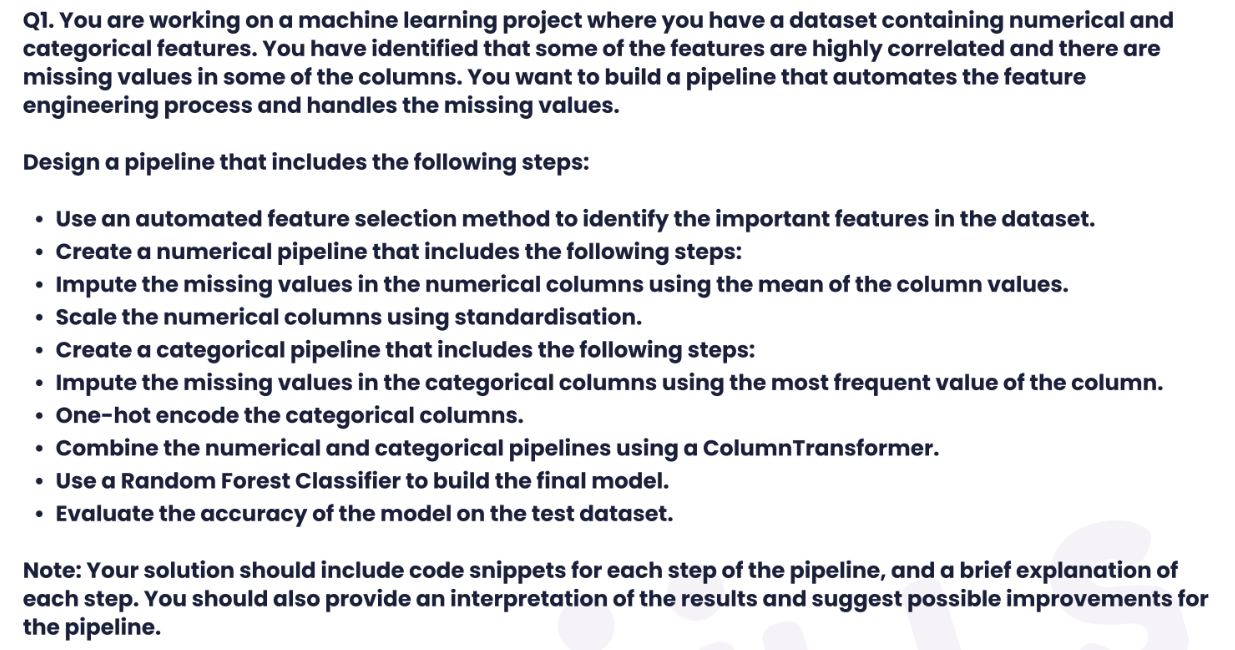

In [19]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [7]:
# loading dataset
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
# encoding target variable 
encoder=LabelEncoder()
df['time']=encoder.fit_transform(df['time'])

In [9]:
# dependent and independent features
y = df.pop('time')
x = df

# splitting into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=52)

In [10]:
# specifying categorical and numerical features
categorical_cols = ['sex', 'smoker','day']
numerical_cols = ['total_bill', 'tip','size']

### Numerical and categorical pipelines

In [11]:
# numerical Pipelines
num_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='mean')), 
        ('scaler',StandardScaler())
    ]

)

# categorical Pipeline
cat_pipeline=Pipeline(
                steps=[
                ('imputer',SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',OneHotEncoder())
                ]

            )  

### Combining both pipelines using column transformer

In [12]:
preprocessor=ColumnTransformer([
    ('num_pipeline',num_pipeline,numerical_cols),
    ('cat_pipeline',cat_pipeline,categorical_cols)

])

In [15]:
# passing data through transformer
x_train=preprocessor.fit_transform(x_train)
x_test=preprocessor.transform(x_test)

### Training classifier

In [17]:
model = RandomForestClassifier()

model.fit(x_train,y_train)
y_test_pred =model.predict(x_test)

### Evaluate model

In [20]:
test_model_score = accuracy_score(y_test,y_test_pred)
print(test_model_score)

0.9591836734693877


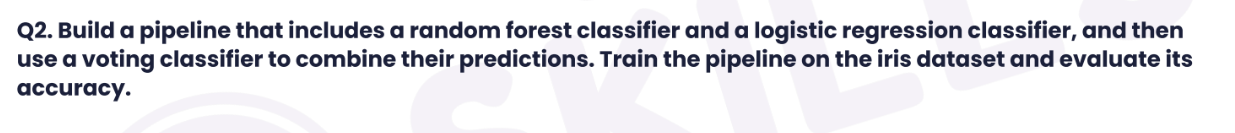

In [23]:
# load dataset
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [24]:
# encode target variable
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [25]:
# depedent and independent features
y = df.pop('species')
x = df

In [29]:
# split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=52)

In [31]:
#voting classifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression

clf1 = LogisticRegression()
clf2 = RandomForestClassifier()

voting_clf = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2)], voting='hard')
voting_clf = voting_clf.fit(x_train, y_train)
y_preds = voting_clf.predict(x_test)

In [32]:
# evaluating 
test_model_score = accuracy_score(y_test,y_preds)
print(test_model_score)

0.9666666666666667
